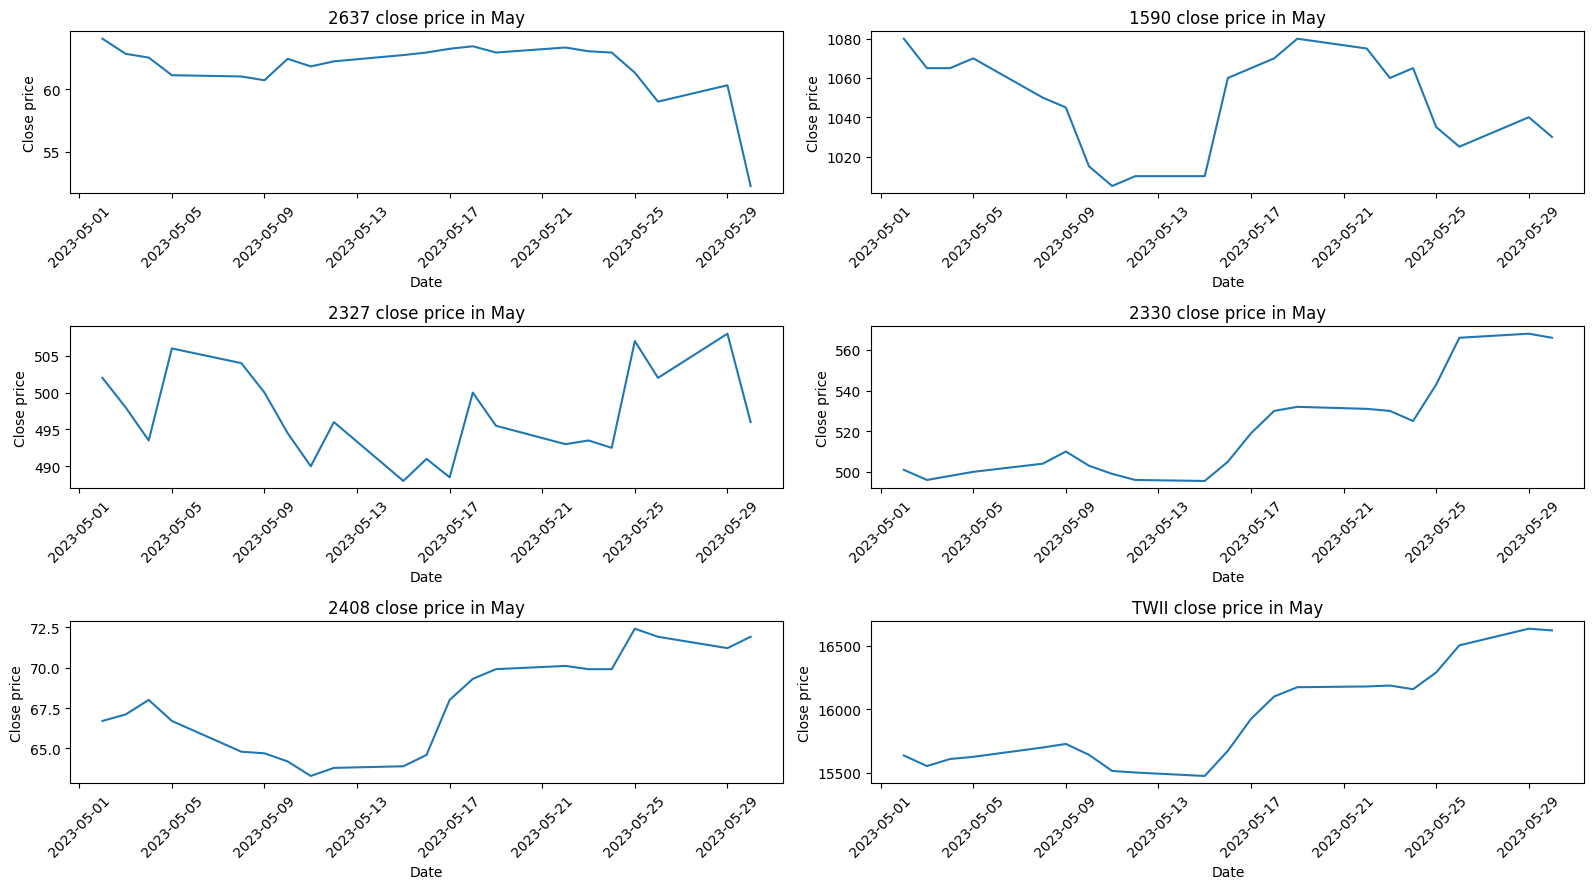

In [50]:
import yfinance as yf
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import time

stocks = ["2637", "1590", "2327", "2330", "2408", "TWII"]

fig = plt.figure(figsize = (16, 9))
fig_ptr = 1

for stock in stocks:
    fig.add_subplot(3, 2, fig_ptr)
    plt.title(f'{stock} close price in May')
    plt.xlabel("Date")
    plt.xticks(rotation = 45)
    plt.ylabel("Close price")

    result = None

    while True:
        if stock == "TWII":
            try:
                result = yf.download("^TWII", start = "2023-05-01", end = "2023-05-31", progress = False, show_errors = False)

                break
            except:
                time.sleep(0.1)
        else:
            try:
                result = yf.download(f"{stock}.TW", start = "2023-05-01", end = "2023-05-31", progress = False, show_errors = False)
                
                if result.empty:
                    result = yf.download(f"{stock}.TWO", start = "2023-05-01", end = "2023-05-31", progress = False, show_errors = False)
                break
            except:
                time.sleep(0.1)

    date = [datetime.strptime(index.strftime('%Y-%m-%d'), '%Y-%m-%d').replace(tzinfo = timezone.utc) for index in result.index]
    
    plt.plot(date, result["Close"], label = stock)

    fig_ptr += 1

plt.tight_layout()
plt.show()